In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('movie_metadata1.csv',index_col=11)
#df.index.names=['movie_title']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   object 
 1   director_name              5043 non-null   object 
 2   num_critic_for_reviews     5043 non-null   int64  
 3   duration                   5043 non-null   int64  
 4   director_facebook_likes    5043 non-null   int64  
 5   actor_3_facebook_likes     5043 non-null   int64  
 6   actor_2_name               5043 non-null   object 
 7   actor_1_facebook_likes     5043 non-null   int64  
 8   gross                      5043 non-null   int64  
 9   genres                     5043 non-null   object 
 10  actor_1_name               5043 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [12]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Spectre,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [14]:
# get all fb data
fb_cols=[X for X in df.columns if 'facebook' in X]

In [39]:
new_df=df[fb_cols]
new_df.head()

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes
movie_title,,,,,,
Avatar,0,855,1000,4834,936,33000
Pirates of the Caribbean: At World's End,563,1000,40000,48350,5000,0
Spectre,0,161,11000,11700,393,85000
The Dark Knight Rises,22000,23000,27000,106759,23000,164000
Star Wars: Episode VII - The Force Awakens,131,49,131,143,12,0


In [40]:
# create clusters 
from sklearn.cluster import KMeans

In [41]:
kmeans_model=KMeans(n_clusters=5)

In [42]:
kmeans_model.fit(new_df)

KMeans(n_clusters=5)

In [43]:
cluster_centers=pd.DataFrame(kmeans_model.cluster_centers_,columns=fb_cols)
cluster_centers

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes
0,1525.890884,1793.169890,23560.773481,33283.484807,6272.012431,6651.446133
1,405.430094,341.229210,2472.892412,4005.141112,548.910343,2036.145010
2,2661.082192,3725.410959,17322.958904,31814.630137,7425.821918,119684.931507
3,1363.890585,877.412214,9197.134860,13514.241730,2407.875318,42150.127226
4,131.400000,2198.600000,316800.000000,353957.600000,33487.600000,141.200000


In [44]:
kmeans_model.labels_

array([3, 0, 2, ..., 1, 1, 1], dtype=int32)

In [45]:
new_df['Cluster No']=kmeans_model.labels_

/var/folders/4v/8s_st9ts6mb1xndxc2t5bsfw0000gn/T/ipykernel_5846/3430981611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster No']=kmeans_model.labels_


In [47]:
new_df[new_df['Cluster No']==1].head()

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,Cluster No
movie_title,,,,,,,
Star Wars: Episode VII - The Force Awakens,131,49,131,143,12,0,1
John Carter,475,530,640,1873,632,24000,1
Quantum of Solace,395,393,451,2023,412,0,1
Robin Hood,0,738,891,3244,882,17000,1
King Kong,0,84,6000,7123,919,0,1


In [48]:
dir(kmeans_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict'

In [50]:
kmeans_model.inertia_

1352267871120.6216

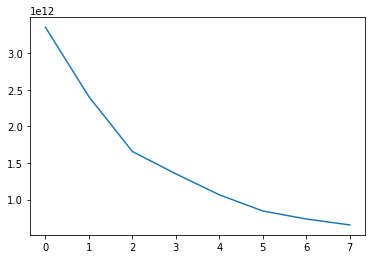

In [52]:
sse= []

for x in range(2,10):
    kmeans_model = KMeans(n_clusters=x)
    kmeans_model.fit(new_df)
    
    sse.append(kmeans_model.inertia_)
plt.plot(sse).  ### flat at 5 on wards

In [54]:
np.unique(kmeans_model.labels_,return_counts=True) # how many movies in each cluster

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([3149,  161,    1,  469,   12,  934,   44,    4,  269]))

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Spectre,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [5]:
from scipy.cluster.hierarchy import dendrogram ,linkage


In [6]:
new_df1=df[['budget','gross']]

In [9]:
new_df1[:20]

,budget,gross
movie_title,,
Avatar,237000000,760505847
Pirates of the Caribbean: At World's End,300000000,309404152
Spectre,245000000,200074175
The Dark Knight Rises,250000000,448130642
Star Wars: Episode VII - The Force Awakens,49,49
John Carter,263700000,73058679
Spider-Man 3,258000000,336530303
Tangled,260000000,200807262
Avengers: Age of Ultron,250000000,458991599


In [26]:
Z=linkage (new_df1[:20],'ward')

In [15]:
Z

array([[6.00000000e+00, 1.00000000e+01, 1.01712334e+07, 2.00000000e+00],
       [3.00000000e+00, 8.00000000e+00, 1.08609570e+07, 2.00000000e+00],
       [2.00000000e+00, 7.00000000e+00, 1.50179032e+07, 2.00000000e+00],
       [1.10000000e+01, 1.90000000e+01, 2.64393953e+07, 2.00000000e+00],
       [9.00000000e+00, 1.50000000e+01, 2.72870537e+07, 2.00000000e+00],
       [1.20000000e+01, 2.30000000e+01, 3.13571426e+07, 3.00000000e+00],
       [1.30000000e+01, 2.10000000e+01, 4.55629799e+07, 3.00000000e+00],
       [1.80000000e+01, 2.20000000e+01, 4.69963239e+07, 3.00000000e+00],
       [5.00000000e+00, 1.40000000e+01, 5.13336426e+07, 2.00000000e+00],
       [1.60000000e+01, 2.50000000e+01, 5.27823132e+07, 4.00000000e+00],
       [2.00000000e+01, 2.40000000e+01, 5.71645040e+07, 4.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 6.89777046e+07, 5.00000000e+00],
       [2.70000000e+01, 2.90000000e+01, 1.03142577e+08, 7.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.38275296e

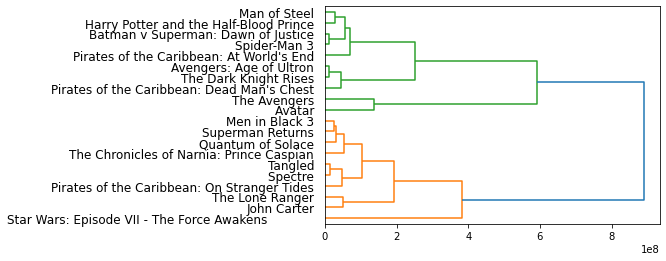

In [27]:
dn=dendrogram(Z,labels=new_df1[:20].index,orientation='right')

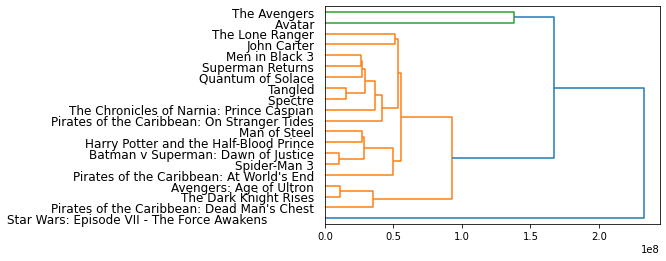

In [28]:
Z=linkage(new_df1[:20],'single')
dn=dendrogram(Z,labels=new_df1[:20].index,orientation='right')